## Pairwise Fst and genetic diversity from GBS data

Number of individuals assayed (N), genetic diversity indices and estimated effective population size (Ne) across four groups of LMB as determined by PCA. Diversity indices include the proportion of polymorphic SNPs for each population (P), observed heterozygosity (Ho), expected heterozygosity (He) and inbreeding coefficient (Fis). The full GBS dataset with 2,782 SNPs was used for calculation of diversity indices. The intermediate FST dataset with 921 SNPs was used for estimation of effective population size

In [7]:
library("adegenet") #For storing genotype data
#library(hierfstat) #For calculating pairwise Fst
library(ggplot2) #For plotting
library(reshape2) #For plotting
library(dplyr)
library("PCAviz") 
#library(plyr)
library("cowplot") #For plotting manuscript figs

In [4]:
load("allfiltu/allfiltu_stratted.genind")

In [5]:
stratted

/// GENIND OBJECT /////////

 // 144 individuals; 8,582 loci; 17,164 alleles; size: 14.4 Mb

 // Basic content
   @tab:  144 x 17164 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 17164 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 29-44)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, CLUSTER )

In [8]:
NA.afDraw<- function(ind){
  ind.mat <- ind@tab
  new.mat <- ind.mat
  af = colSums(ind.mat[,seq(1,ncol(ind.mat)-1,2)],na.rm = TRUE)/
      (2*apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],2,function(x) sum(!is.na(x))))
  af.Draw <- function(geno, af){
     new <- function(geno,af){
        if(is.na(geno)){
        newA = rbinom(1,2,af)
        }
        else {newA <- geno}
        return(newA)
   }
  new.row <- mapply(geno,af,FUN = new)
  return(new.row)}
  
  new.mat[,seq(1,ncol(ind.mat)-1,2)] <- t(apply(ind.mat[,seq(1,ncol(ind.mat)-1,2)],1,af.Draw,af))
  new.mat[,seq(2,ncol(ind.mat),2)] <- 2-new.mat[,seq(1,ncol(ind.mat)-1,2)]
  new.ind <- ind
  new.ind@tab <- new.mat
  return(new.ind)
}

In [9]:
u.na <- NA.afDraw(stratted)

Select the number of axes: 


You can reproduce this result non-interactively with: 
dudi.pca(df = u.na, center = TRUE, scale = TRUE, scannf = FALSE, nf = NA)




ERROR: Error in if (nf <= 0) nf <- 2: missing value where TRUE/FALSE needed


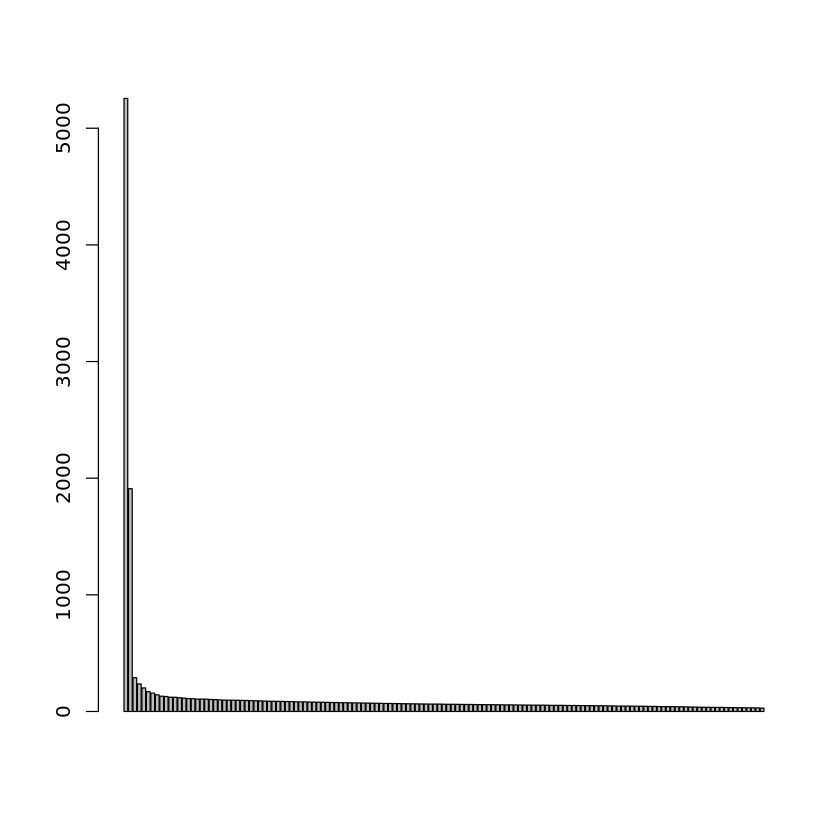

In [10]:

pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = T)

In [11]:

pca <- dudi.pca(u.na,cent=TRUE,scale=TRUE,scannf = F, nf = 5)

In [12]:
levels(strata(u.na)$LOCATION)

[1] "Allatoona_GA"      "Guntersville_AL"   "LayLake_AL"       
 [4] "Lamar_County_Lake" "ReevesEufala_AL"   "LakeHarding_AL"   
 [7] "RockyMt_GA"        "BBCanot_AL"        "DOliveBay_AL"     
[10] "SipseyRiver_AL"    "Tensaw_AL"         "StJohnsRiver_FL"  
[13] "ASF_FL"            "FLBassCons_FL"     "LakeMattoon_IL"   
[16] "MillCreek_IL"      "ASF_N"             "OtterLake_IL"     
[19] "ReelfootRes_TN"    "SugarLake_MN"

In [13]:
levels(strata(u.na)$POPULATION)

[1] "ILMB" "DB"   "FL"   "NB"

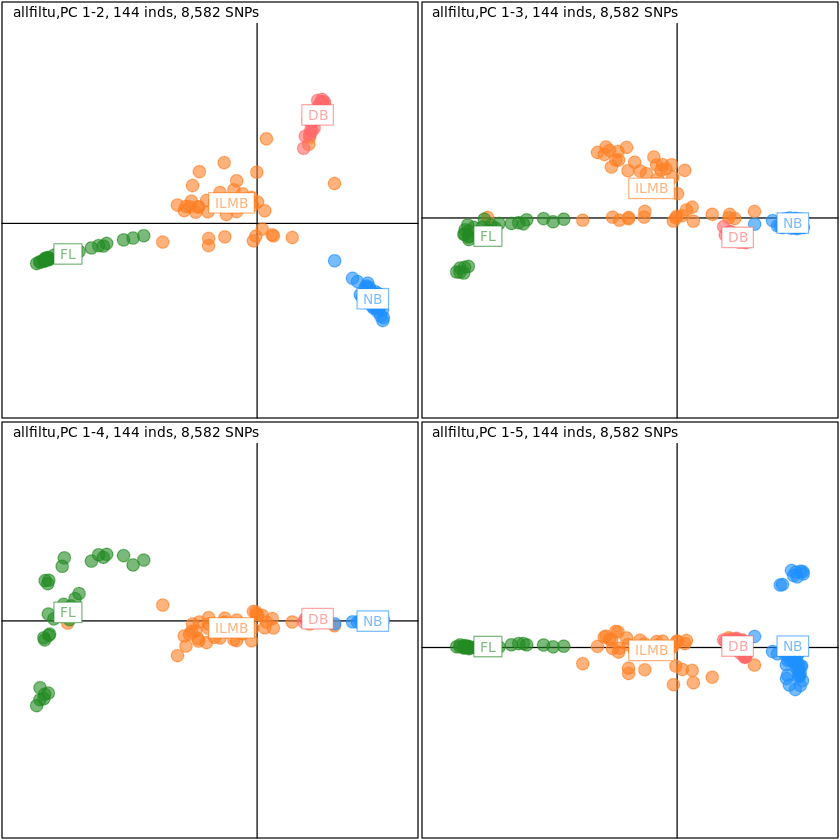

In [16]:
col6 <-  c("chocolate1","indianred1","forestgreen","dodgerblue")

par(mfrow=c(2,2))
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=2, 
        sub = "allfiltu,PC 1-2, 144 inds, 8,582 SNPs ",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=3, 
        sub = "allfiltu,PC 1-3, 144 inds, 8,582 SNPs",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=4, 
        sub = "allfiltu,PC 1-4, 144 inds, 8,582 SNPs ",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)
s.class(pca$li, strata(u.na)$POPULATION,xax=1,yax=5, 
        sub = "allfiltu,PC 1-5, 144 inds, 8,582 SNPs",
        possub = "topleft",col=transp(col6,.6),axesell=FALSE,
        cstar=0, cpoint=3, grid=FALSE, cellipse = 0)

In [17]:
eig.perc <- 100*pca$eig/sum(pca$eig)
head(eig.perc)

[1] 30.6206451 11.1259502  1.6872048  1.3745114  1.1738909  0.9886159

In [18]:
li <-pca$li
c1 <- pca$c1
#Create dataframe of info like latitude and population for each individual
#colnames(info_mat) <- c("Population","Location","Region","Latitude","Longitude")
colnames(c1) <- colnames(li)
#create pcaviz object
pviz <- pcaviz(x=li,rotation=c1,dat=u.na$strata)

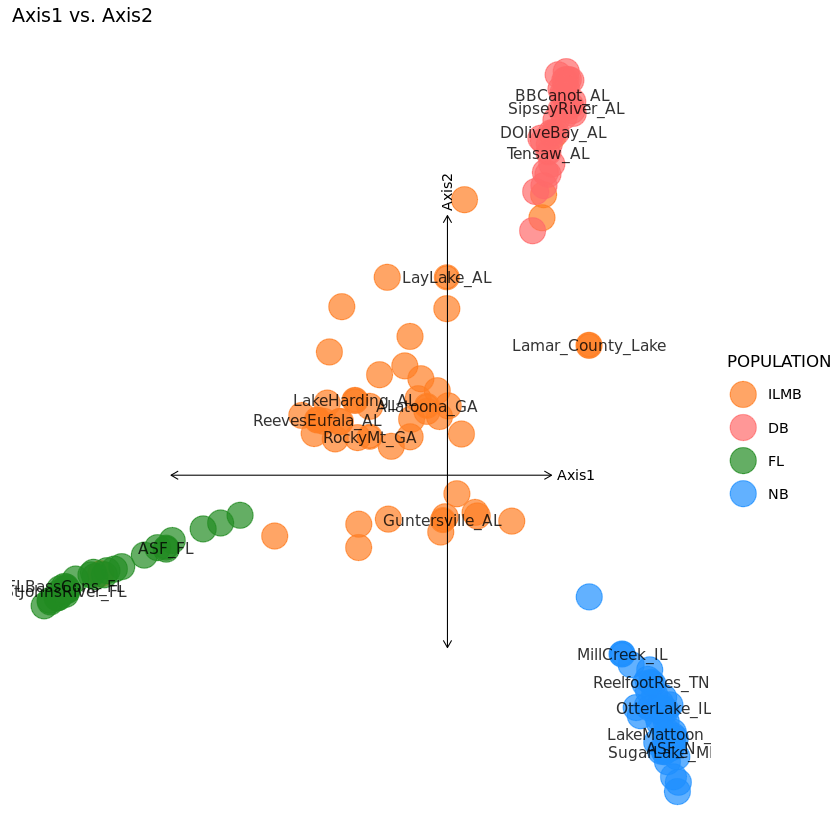

In [29]:
#geom.point.params = p
plot(pviz,color = "POPULATION",group="LOCATION",draw.points = T, group.summary.labels = T, 
     draw.pc.axes = T, geom.point.params= list(size = 7, alpha = 0.7),colors = col6)

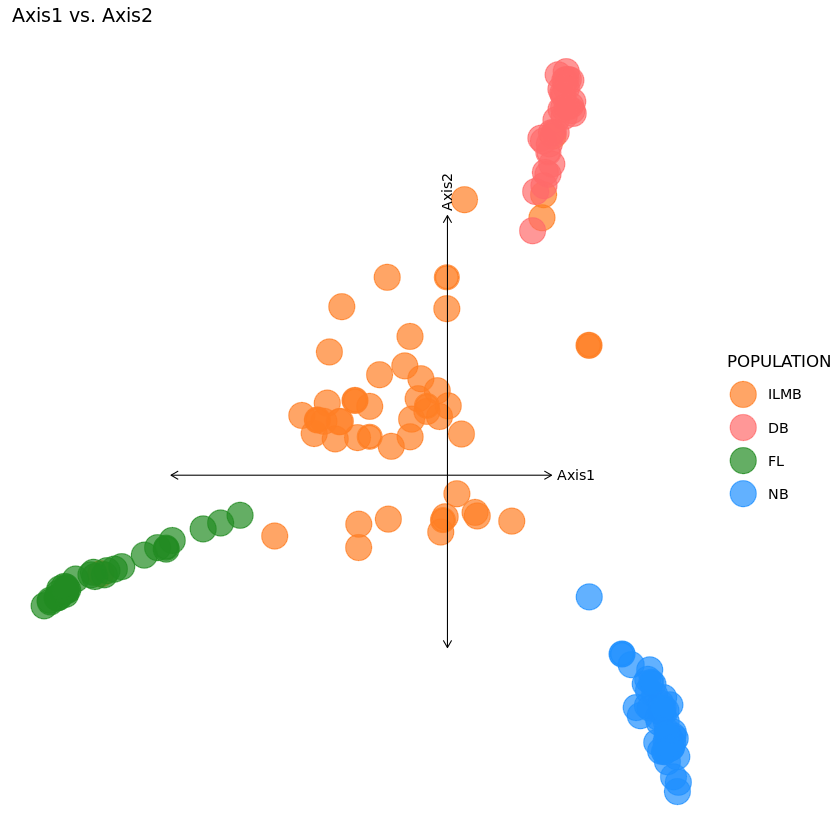

In [30]:
#geom.point.params = p
plot(pviz,color = "POPULATION",group="LOCATION",draw.points = T, group.summary.labels = F, 
     draw.pc.axes = T, geom.point.params= list(size = 7, alpha = 0.7),colors = col6)

## The 4 clusters identified with PCA 
### Genetic Diversity

In [17]:
allfiltu_Clust.hf <- genind2hierfstat(stratted,pop = stratted$strata$CLUSTER) 

In [14]:
#All populations
stratted@pop <- stratted$strata$CLUSTER
comb <- summary(stratted)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

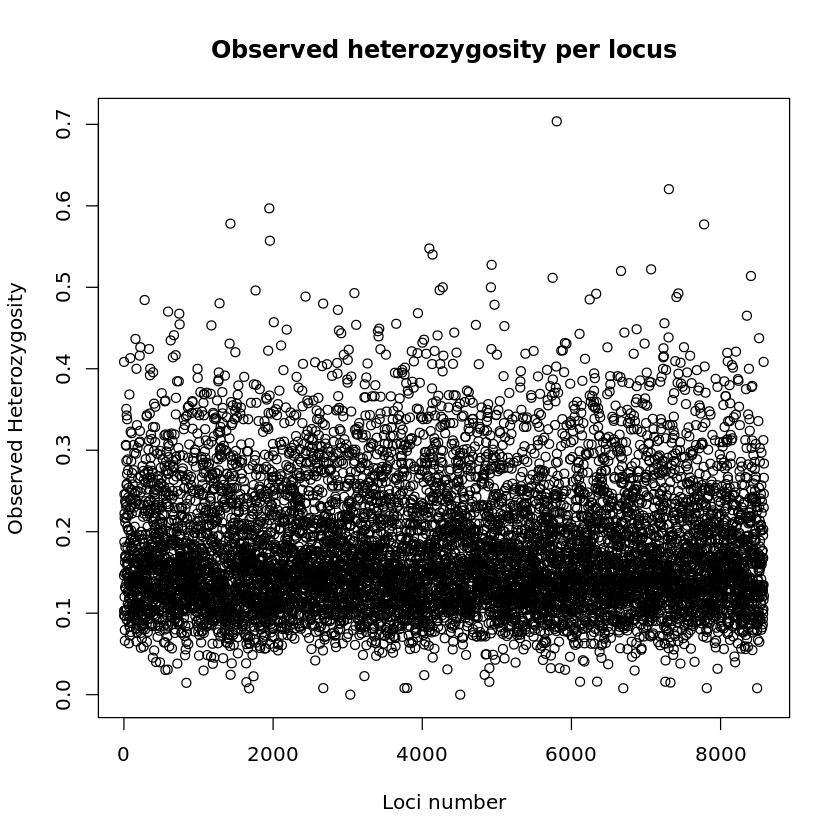

In [15]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

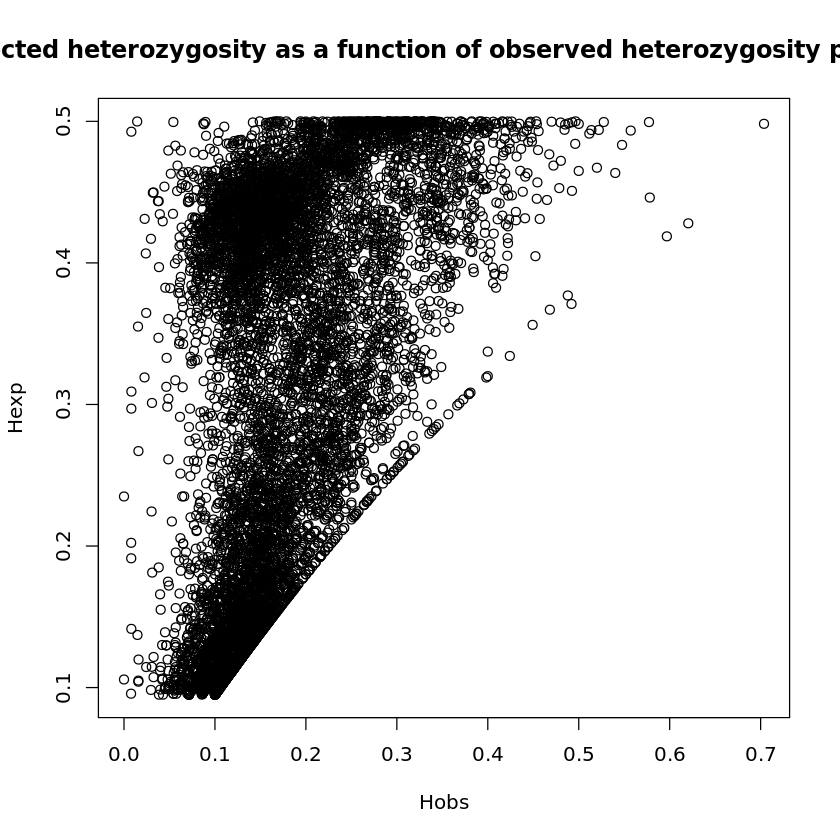

In [16]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [18]:
# calculate basic popgen statistics for the overall dataset
basicstat <- basic.stats(allfiltu_Clust.hf, diploid = TRUE, digits = 3)

In [19]:
as.data.frame(basicstat$overall)

,basicstat$overall
,<dbl>
Ho,0.177
Hs,0.189
Ht,0.329
Dst,0.140
Htp,0.375
Dstp,0.187
Fst,0.426
Fstp,0.498
Fis,0.062


In [20]:
# get bootstrap confidence values for Fis
boot <- boot.ppfis(allfiltu_Clust.hf,nboot = 1000)
boot5 <- boot.ppfis(allfiltu_Clust.hf,nboot = 1000,quant = 0.5)

In [21]:
colnames(basicstat$Ho)

[1] "ILMB" "DB"   "FL"   "NB"

In [22]:
# combine all pop statistics
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci)
x

,Ho,He,Fis,ll,hl
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ILMB,0.3085251,0.3186904,0.0318,0.0273,0.0365
DB,0.1585923,0.1705140,0.0700,0.0626,0.0771
FL,0.1158846,0.1258117,0.0789,0.0685,0.0889
NB,0.1244113,0.1390212,0.1051,0.0972,0.1121


In [23]:
summary(Fis)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03180 0.06045 0.07445 0.07145 0.08545 0.10510 

### Pairwise Fst

In [24]:
fst.mat <- genet.dist(allfiltu_Clust.hf, method = "WC84")

In [25]:
fst.mat

        ILMB        DB        FL
DB 0.2029136                    
FL 0.3284844 0.6771247          
NB 0.3472491 0.4588864 0.7491941

In [29]:
gindF.fst.mat.triN <- as.matrix(fst.mat)
round(gindF.fst.mat.triN,4)

,ILMB,DB,FL,NB
ILMB,0.0000,0.2029,0.3285,0.3472
DB,0.2029,0.0000,0.6771,0.4589
FL,0.3285,0.6771,0.0000,0.7492
NB,0.3472,0.4589,0.7492,0.0000


In [28]:
write.table(gindF.fst.mat.triN, file="allfiltu_cluster.pwfst",row.names = T,col.names = T)

In [30]:
meltedN <- melt(gindF.fst.mat.triN, na.rm =TRUE)

In [31]:
#Average pairwise Fst
summary(meltedN$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1522  0.3379  0.3455  0.5134  0.7492 

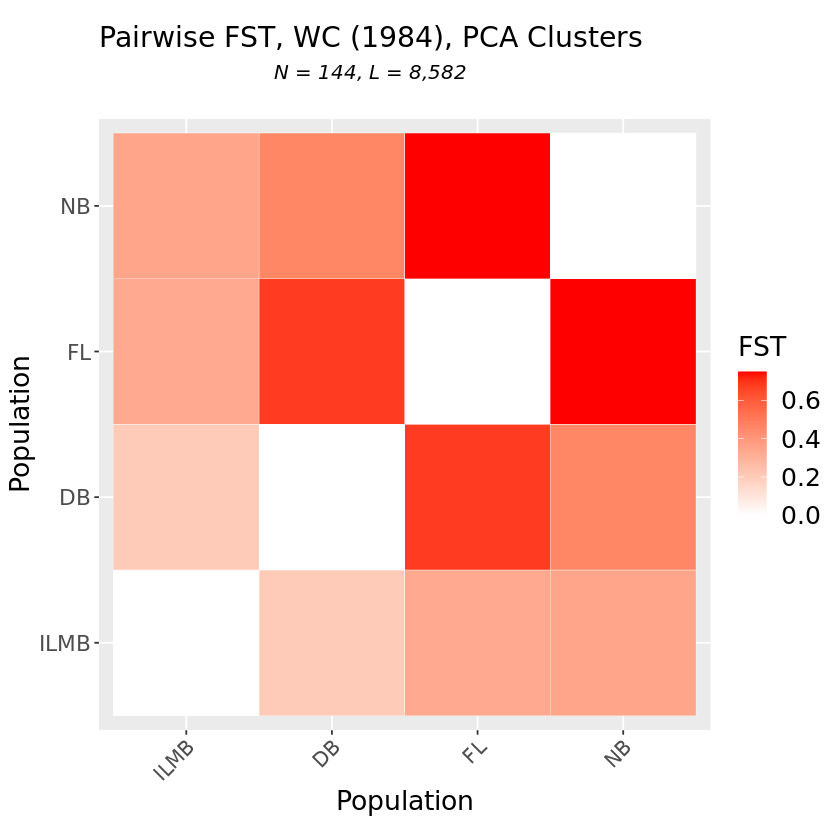

In [32]:
neutral <- ggplot(data = meltedN, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), PCA Clusters", atop(italic("N = 144, L = 8,582"), ""))))+
  labs( x = "Population", y = "Population") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  theme(axis.title = element_text(size = 16),legend.text = element_text(size =15), legend.title = element_text(size =16)) +
  theme(plot.title = element_text(size = 17)) +
coord_fixed()
neutral

## Locations with at least 5 individuals

In [33]:
stratted

/// GENIND OBJECT /////////

 // 144 individuals; 8,582 loci; 17,164 alleles; size: 14.4 Mb

 // Basic content
   @tab:  144 x 17164 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 17164 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input, write = TRUE)

 // Optional content
   @pop: population of each individual (group size range: 30-42)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, CLUSTER )

In [78]:
fil <- as.data.frame(stratted$strata,stringsAsFactors = F) %>% group_by(LOCATION) %>% summarise(N = n()) %>% filter(N >=5) 
N <- fil$N
fil <- unique(fil$LOCATION)
fil

[1] Allatoona_GA    Guntersville_AL LayLake_AL      ReevesEufala_AL
 [5] LakeHarding_AL  RockyMt_GA      BBCanot_AL      DOliveBay_AL   
 [9] SipseyRiver_AL  StJohnsRiver_FL ASF_FL          FLBassCons_FL  
[13] LakeMattoon_IL  ASF_N           OtterLake_IL    SugarLake_MN   
20 Levels: Allatoona_GA Guntersville_AL LayLake_AL ... SugarLake_MN

In [53]:
indNames(stratted)[which(stratted$strata$LOCATION %in% fil)]

[1] "ALL02"       "ALL03"       "ALL04"       "ALL05"       "ALL06"      
  [6] "ALL11"       "ALL12"       "ALLATOONA01" "ALLATOONA10" "GU-36"      
 [11] "GU-42"       "GU-45"       "GU-58"       "GU46"        "GU51"       
 [16] "GU55"        "GU56"        "GU57"        "GU61"        "LA006"      
 [21] "LA015"       "LA030"       "LA032"       "LA033"       "LA034"      
 [26] "LA10-014"    "LA11-36"     "LA11-39"     "LE04"        "LE05"       
 [31] "LE10"        "LE21"        "LE23"        "LHARD-32"    "LHARD-33"   
 [36] "LHARD-34"    "LHARD-35"    "LHARD-36"    "RM09"        "RM1"        
 [41] "RM11"        "RM12"        "RM13"        "CANOT-11830" "CANOT-11832"
 [46] "CANOT-2617"  "CANOT11829"  "CANOT11837"  "CANOT11838"  "DB-2592"    
 [51] "DB-2593"     "DB-2637"     "DB12041"     "DB2589"      "DB2590"     
 [56] "DB2634"      "DB2635"      "SIPS-09"     "SIPS-110"    "SIPS-114"   
 [61] "SIPS-13"     "SIPS-14"     "SIPS-18"     "SIPS-20"     "SIPS-26"    
 [66] "SIPS-27"     "SIPS-32"     "Sipsey-122"  "Sipsey-123"  "Sipsey-124" 
 [71] "FL01"        "FL09"        "FL12"        "FL15"        "FL16"       
 [76] "FL20"        "FL21"        "FL23"        "FL30"        "FL55"       
 [81] "FL60"        "FL64"        "FL68"        "FL70"        "FL71"       
 [86] "FL72"        "FL73"        "FLAL01"      "FLAL01II"    "FLAL02"     
 [91] "FLAL02II"    "FLAL03"      "FLAL04"      "FLAL04II"    "FLF17"      
 [96] "FLM10"       "FLM12"       "FLM13"       "FLM15"       "MATT-01"    
[101] "MATT-02"     "MATT-03"     "MATT-04"     "MATT-05"     "MATT-06"    
[106] "MATT-07"     "MATT-08"     "MATT-09"     "MATT-10"     "NB07"       
[111] "NB11"        "NB12"        "NB13"        "NB19"        "NBM01"      
[116] "Otter-12"    "Otter-13"    "Otter-16"    "Otter-17"    "Otter-19"   
[121] "Otter-21"    "Otter-23"    "Otter-4"     "Otter-5"     "Otter-6"    
[126] "SL04"        "SL10"        "SL11"        "SL14"        "SL15"       
[131] "SL16"        "SL19"        "SL2"         "SL8"

In [67]:
stratted.5loc <- stratted[i=indNames(stratted)[which(stratted$strata$LOCATION %in% fil)],drop=TRUE]
stratted.5loc <- stratted.5loc[loc=isPoly(stratted.5loc)]
stratted.5loc$strata$LOCATION <- factor(stratted.5loc$strata$LOCATION)
stratted.5loc


/// GENIND OBJECT /////////

 // 134 individuals; 8,582 loci; 17,164 alleles; size: 13.7 Mb

 // Basic content
   @tab:  134 x 17164 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 17164 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, loc = ..1, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 30-38)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, CLUSTER )

### Genetic Diversity

In [68]:
loc5_loc.hf <- genind2hierfstat(stratted.5loc,pop = stratted.5loc$strata$LOCATION) 

In [69]:
#All populations
stratted.5loc@pop <- factor(stratted.5loc$strata$LOCATION)
comb <- summary(stratted.5loc)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

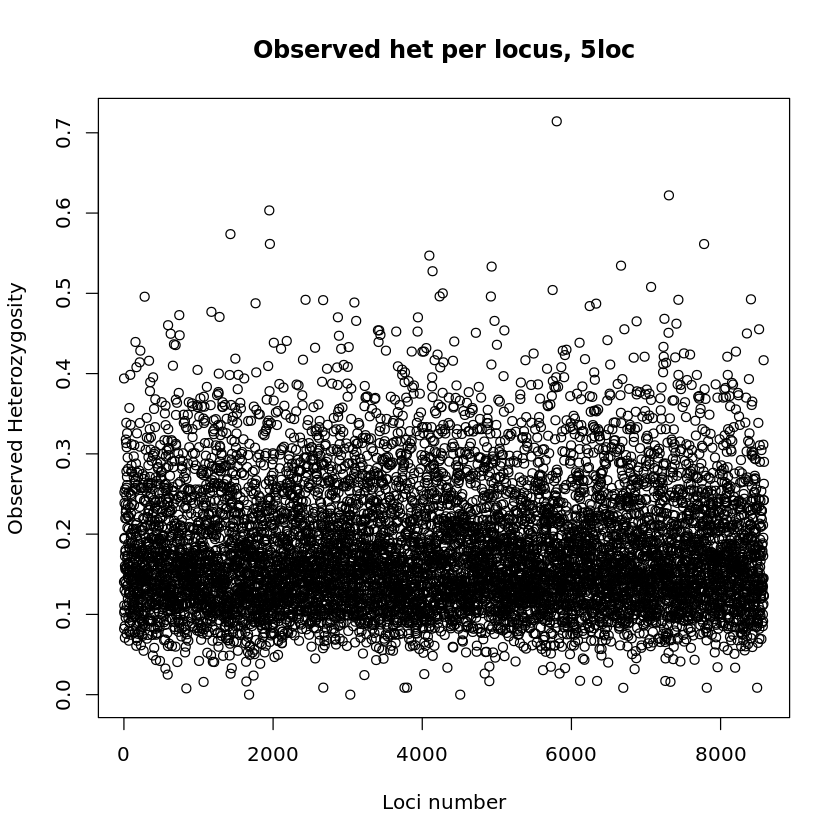

In [70]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed het per locus, 5loc")

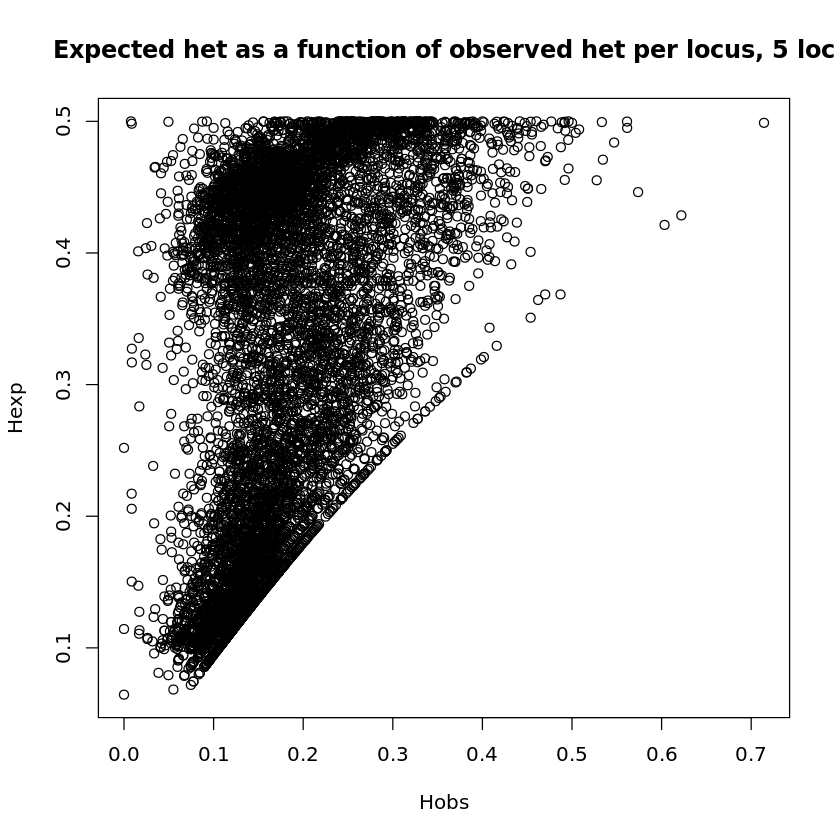

In [71]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected het as a function of observed het per locus, 5 loc")

In [72]:
# calculate basic popgen statistics for the overall dataset
basicstat <- basic.stats(loc5_loc.hf, diploid = TRUE, digits = 3)

In [73]:
as.data.frame(basicstat$overall)

,basicstat$overall
,<dbl>
Ho,0.188
Hs,0.193
Ht,0.327
Dst,0.134
Htp,0.336
Dstp,0.142
Fst,0.409
Fstp,0.425
Fis,0.025


In [74]:
# get bootstrap confidence values for Fis
boot <- boot.ppfis(loc5_loc.hf,nboot = 1000)
boot5 <- boot.ppfis(loc5_loc.hf,nboot = 1000,quant = 0.5)

In [75]:
colnames(basicstat$Ho)

[1] "Allatoona_GA"    "Guntersville_AL" "LayLake_AL"      "ReevesEufala_AL"
 [5] "LakeHarding_AL"  "RockyMt_GA"      "BBCanot_AL"      "DOliveBay_AL"   
 [9] "SipseyRiver_AL"  "StJohnsRiver_FL" "ASF_FL"          "FLBassCons_FL"  
[13] "LakeMattoon_IL"  "ASF_N"           "OtterLake_IL"    "SugarLake_MN"

In [79]:
# combine all pop statistics
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,N)
x

,Ho,He,Fis,ll,hl,N
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Allatoona_GA,0.27697611,0.29545071,0.0625,0.0535,0.0720,9
Guntersville_AL,0.34609065,0.32409695,-0.0679,-0.0752,-0.0604,10
LayLake_AL,0.25187054,0.28557131,0.1176,0.1096,0.1268,9
ReevesEufala_AL,0.27595595,0.29072233,0.0505,0.0397,0.0623,5
LakeHarding_AL,0.31511850,0.31025006,-0.0160,-0.0279,-0.0044,5
RockyMt_GA,0.28717409,0.30545886,0.0594,0.0475,0.0721,5
BBCanot_AL,0.14511524,0.14997016,0.0325,0.0152,0.0475,6
DOliveBay_AL,0.14031251,0.14546702,0.0358,0.0215,0.0502,8
SipseyRiver_AL,0.16723433,0.17059555,0.0203,0.0105,0.0305,13


In [80]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.06790 -0.00405  0.03075  0.02791  0.05273  0.11760 

### Pairwise Fst

In [81]:
fst.mat <- genet.dist(loc5_loc.hf, method = "WC84")

In [82]:
fst.mat

                Allatoona_GA Guntersville_AL  LayLake_AL ReevesEufala_AL
Guntersville_AL  0.048071604                                            
LayLake_AL       0.042562113     0.066702365                            
ReevesEufala_AL  0.074058757     0.076911950 0.083247714                
LakeHarding_AL   0.042195840     0.051491152 0.043248152     0.014996848
RockyMt_GA       0.056360462     0.049746625 0.063234416     0.033241939
BBCanot_AL       0.206770218     0.234285784 0.135413326     0.353630364
DOliveBay_AL     0.216510383     0.242919217 0.142737939     0.366687145
SipseyRiver_AL   0.214196109     0.240029871 0.146771552     0.357759524
StJohnsRiver_FL  0.475114031     0.416750352 0.474612867     0.372182581
ASF_FL           0.397990390     0.339071142 0.398471470     0.297485754
FLBassCons_FL    0.400152617     0.342192962 0.401388294     0.303780517
LakeMattoon_IL   0.351155469     0.280883276 0.413254557     0.501313879
ASF_N            0.335573358     0.266066091 0.3978

In [83]:
gindF.fst.mat.triN <- as.matrix(fst.mat)
round(gindF.fst.mat.triN,4)

,Allatoona_GA,Guntersville_AL,LayLake_AL,ReevesEufala_AL,LakeHarding_AL,RockyMt_GA,BBCanot_AL,DOliveBay_AL,SipseyRiver_AL,StJohnsRiver_FL,ASF_FL,FLBassCons_FL,LakeMattoon_IL,ASF_N,OtterLake_IL,SugarLake_MN
Allatoona_GA,0.0000,0.0481,0.0426,0.0741,0.0422,0.0564,0.2068,0.2165,0.2142,0.4751,0.3980,0.4002,0.3512,0.3356,0.3371,0.4352
Guntersville_AL,0.0481,0.0000,0.0667,0.0769,0.0515,0.0497,0.2343,0.2429,0.2400,0.4168,0.3391,0.3422,0.2809,0.2661,0.2684,0.3634
LayLake_AL,0.0426,0.0667,0.0000,0.0832,0.0432,0.0632,0.1354,0.1427,0.1468,0.4746,0.3985,0.4014,0.4133,0.3978,0.3979,0.4962
ReevesEufala_AL,0.0741,0.0769,0.0832,0.0000,0.0150,0.0332,0.3536,0.3667,0.3578,0.3722,0.2975,0.3038,0.5013,0.4846,0.4882,0.5884
LakeHarding_AL,0.0422,0.0515,0.0432,0.0150,0.0000,0.0134,0.2764,0.2876,0.2839,0.4239,0.3442,0.3484,0.4463,0.4280,0.4313,0.5384
RockyMt_GA,0.0564,0.0497,0.0632,0.0332,0.0134,0.0000,0.2939,0.3071,0.2991,0.4326,0.3521,0.3553,0.4355,0.4180,0.4206,0.5305
BBCanot_AL,0.2068,0.2343,0.1354,0.3536,0.2764,0.2939,0.0000,0.0080,0.0349,0.7236,0.7238,0.7188,0.5096,0.5228,0.4869,0.6329
DOliveBay_AL,0.2165,0.2429,0.1427,0.3667,0.2876,0.3071,0.0080,0.0000,0.0503,0.7219,0.7211,0.7174,0.5086,0.5224,0.4876,0.6260
SipseyRiver_AL,0.2142,0.2400,0.1468,0.3578,0.2839,0.2991,0.0349,0.0503,0.0000,0.6944,0.6755,0.6746,0.4634,0.4688,0.4443,0.5587
StJohnsRiver_FL,0.4751,0.4168,0.4746,0.3722,0.4239,0.4326,0.7236,0.7219,0.6944,0.0000,0.1078,0.0982,0.7623,0.7690,0.7571,0.8053


In [84]:
write.table(gindF.fst.mat.triN, file="5loc_allfiltu_loc.pwfst",row.names = T,col.names = T)

In [85]:
meltedN <- melt(gindF.fst.mat.triN, na.rm =TRUE)

In [86]:
#Average pairwise Fst
summary(meltedN$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1285  0.3545  0.3543  0.4975  0.8353 

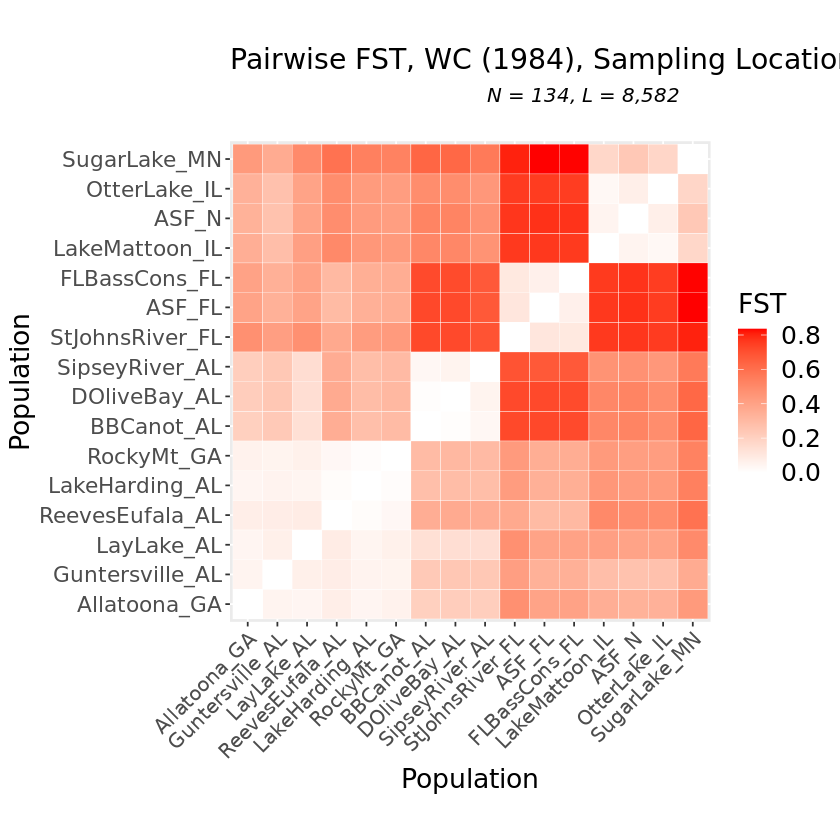

In [87]:
neutral <- ggplot(data = meltedN, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Sampling Locations GBS", atop(italic("N = 134, L = 8,582"), ""))))+
  labs( x = "Population", y = "Population") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  theme(axis.title = element_text(size = 16),legend.text = element_text(size =15), legend.title = element_text(size =16)) +
  theme(plot.title = element_text(size = 17)) +
coord_fixed()
neutral

## PopGen with fixed SNPs